In [1]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

## K-Nearest Neighbors Classification

In [3]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=4)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7402597402597403
Precision: 0.7272727272727273
Recall: 0.47058823529411764
F1-Score: 0.5714285714285714


## Confusion Matrix

In [4]:

# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(model , feature_test, target_test, values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\tyler\Documents\term4\acit4880\week7\.venv\lib\site-packages\sklearn\metrics\__init__.py)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


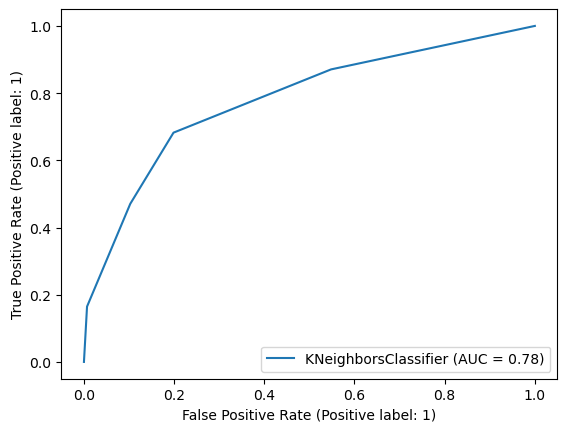

In [ ]:
predictions_prob = model.predict_proba(feature_test)[::,1]

# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model , feature_test, target_test)

In [ ]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7803384367445608


Q1. Based on the above confusion matrix, calculate by using the correct equation: Accuracy, Precision, Recall, F1-score. Explain the meaning of the numbers you get. 

Q2. Keep modifying the number of neighbours (K) to  7, 17, 15, 21, 25, 33, can you get a higher accuracy, F1-Score? Can you get a better AUC?

Q3. Compare your results to the accuracy and AUC of Logistic Regression Model.

Q4. Write down all of your comparisons/tables/charts and answers in a document/pdf file. 